In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-33.23571269546401 -43.35625786789231
79.9443675032841 -134.7651850578817
4.042900703539658 -10.452169264772323
-80.78352447690894 -171.70683671858507
75.58618958850872 -14.819942354268619
72.66578288692008 126.57226998599134
-25.545541039533845 -16.10372447288239
-43.07469619714694 115.97739037709545
1.7783533410969738 -39.50927100459316
69.68702743756225 25.52463382237562
61.10343734289353 -72.67751042624494
37.28586671807602 -122.66967338051387
10.833026214601603 -176.3582950604895
23.45249645760697 -32.95736323928264
-75.13010920019467 141.62240586055788
-18.27883583084632 -54.43406771867468
-19.2996044957585 -6.576753833855463
41.24293955299845 -143.3188628278112
28.429735563826057 178.3178697112205
71.31751226803877 -89.74315866807407
32.38884164053243 -65.04105285796923
22.998379233439223 46.990467156709684
-7.82124640306921 59.5866849175581
-2.4481538768931728 -148.4606388290709
28.2612809845523 49.60958083327557
-54.05175812305581 71.33075161907536
36.274550586700386 -3.563746

-20.21365680401634 -68.23770454407227
32.3015455137609 -16.484082226853957
-22.116811004308175 -145.31041355887814
-85.73248812066807 -61.68979937140389
-9.350737852636811 -45.19559648195522
5.736472115837955 -123.61153116680822
-29.034267985471416 -155.07015199574113
22.90550142249245 -96.05282621757704
-38.794990459552125 -141.04969540165555
44.251324545820154 -7.922109839156576
24.89166638009526 -49.92175031589264
-10.615872924750818 91.53904116797071
70.67151626807694 136.6386893710549
74.7216712169348 91.17072044934474
-38.50064253468822 133.01332253164026
-33.63581766409196 115.13001937259565
-65.74730019095962 -34.55976009801296
21.461418955666787 -146.05417848444262
-45.098527362884006 -52.55033209211703
15.288462004009446 -66.39328069039423
48.150941915153936 -131.13663594751935
-28.11443497721993 -53.381073634060925
22.085021234184552 112.40165200875782
48.67134157466518 169.40379978324773
18.22481700501355 -141.68374539192675
71.42920593439302 -111.78250676278859
-43.8460214

In [17]:
from citipy import citipy

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [22]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | laguna
Processing Record 2 of Set 13 | tuktoyaktuk
Processing Record 3 of Set 13 | buchanan
Processing Record 4 of Set 13 | vaini
Processing Record 5 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 13 | tiksi
Processing Record 7 of Set 13 | jamestown
Processing Record 8 of Set 13 | albany
Processing Record 9 of Set 13 | itarema
Processing Record 10 of Set 13 | karasjok
Processing Record 11 of Set 13 | iqaluit
Processing Record 12 of Set 13 | half moon bay
Processing Record 13 of Set 13 | kapaa
Processing Record 14 of Set 13 | ponta do sol
Processing Record 15 of Set 13 | hobart
Processing Record 16 of Set 13 | coxim
Processing Record 17 of Set 13 | sitka
Processing Record 18 of Set 13 | butaritari
Processing Record 19 of Set 13 | thompson
Processing Record 20 of Set 13 | hamilton
Processing Record 21 of Set 13 | riyadh
Processing Record 22 of Set 13 | victoria

Processing Record 35 of Set 16 | hofn
Processing Record 36 of Set 16 | aja
Processing Record 37 of Set 16 | mount isa
Processing Record 38 of Set 16 | kutum
Processing Record 39 of Set 16 | kununurra
Processing Record 40 of Set 16 | rawson
Processing Record 41 of Set 16 | kamennogorsk
Processing Record 42 of Set 16 | viedma
Processing Record 43 of Set 16 | bisho
Processing Record 44 of Set 16 | manokwari
Processing Record 45 of Set 16 | eydhafushi
Processing Record 46 of Set 16 | severo-kurilsk
Processing Record 47 of Set 16 | burgeo
Processing Record 48 of Set 16 | kadykchan
City not found. Skipping...
Processing Record 49 of Set 16 | roma
Processing Record 50 of Set 16 | paradwip
City not found. Skipping...
Processing Record 1 of Set 17 | verdalsora
City not found. Skipping...
Processing Record 2 of Set 17 | erenhot
Processing Record 3 of Set 17 | taoudenni
Processing Record 4 of Set 17 | waipawa
Processing Record 5 of Set 17 | salalah
Processing Record 6 of Set 17 | takaka
Processin

Processing Record 22 of Set 20 | jiayuguan
Processing Record 23 of Set 20 | klaksvik
Processing Record 24 of Set 20 | umm durman
City not found. Skipping...
Processing Record 25 of Set 20 | leh
Processing Record 26 of Set 20 | inirida
Processing Record 27 of Set 20 | ratnagiri
Processing Record 28 of Set 20 | dunedin
Processing Record 29 of Set 20 | nichinan
Processing Record 30 of Set 20 | belaya gora
Processing Record 31 of Set 20 | debre sina
Processing Record 32 of Set 20 | maghama
City not found. Skipping...
Processing Record 33 of Set 20 | fasa
Processing Record 34 of Set 20 | lubbock
Processing Record 35 of Set 20 | miri
Processing Record 36 of Set 20 | olden
Processing Record 37 of Set 20 | laranjeiras do sul
Processing Record 38 of Set 20 | banmo
City not found. Skipping...
Processing Record 39 of Set 20 | sakakah
Processing Record 40 of Set 20 | kokopo
Processing Record 41 of Set 20 | anadyr
Processing Record 42 of Set 20 | dhidhdhoo
Processing Record 43 of Set 20 | vyartsily

Processing Record 9 of Set 24 | kadingilan
Processing Record 10 of Set 24 | aksu
Processing Record 11 of Set 24 | semporna
Processing Record 12 of Set 24 | semey
Processing Record 13 of Set 24 | stade
Processing Record 14 of Set 24 | hailar
Processing Record 15 of Set 24 | bathurst
Processing Record 16 of Set 24 | lampazos de naranjo
Processing Record 17 of Set 24 | fruitvale
Processing Record 18 of Set 24 | vuktyl
Processing Record 19 of Set 24 | zeya
Processing Record 20 of Set 24 | soure
Processing Record 21 of Set 24 | milkovo
Processing Record 22 of Set 24 | arvika
Processing Record 23 of Set 24 | luanda
Processing Record 24 of Set 24 | canto do buriti
Processing Record 25 of Set 24 | sioux lookout
Processing Record 26 of Set 24 | bom jesus
Processing Record 27 of Set 24 | phan rang
City not found. Skipping...
Processing Record 28 of Set 24 | poptun
Processing Record 29 of Set 24 | mata
Processing Record 30 of Set 24 | bargal
City not found. Skipping...
Processing Record 31 of Set

In [29]:
len(city_data)

565

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Laguna,38.4210,-121.4238,80.08,70,0,6.91,US,2022-07-14 15:40:23
1,Tuktoyaktuk,69.4541,-133.0374,39.20,81,75,23.02,CA,2022-07-14 15:43:58
2,Buchanan,5.8808,-10.0467,76.60,85,100,10.65,LR,2022-07-14 15:43:59
3,Vaini,-21.2000,-175.2000,75.36,100,2,9.22,TO,2022-07-14 15:43:11
4,Tiksi,71.6872,128.8694,41.32,90,88,3.49,RU,2022-07-14 15:44:00
5,Jamestown,42.0970,-79.2353,75.02,61,0,9.22,US,2022-07-14 15:42:58
6,Albany,42.6001,-73.9662,78.26,62,6,1.01,US,2022-07-14 15:43:10
7,Itarema,-2.9248,-39.9167,85.91,57,7,15.61,BR,2022-07-14 15:44:01
8,Karasjok,69.4719,25.5112,64.60,87,100,16.04,NO,2022-07-14 15:44:01
9,Iqaluit,63.7506,-68.5145,46.13,81,40,5.75,CA,2022-07-14 15:44:01


In [30]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2022-07-14 15:40:23,38.4210,-121.4238,80.08,70,0,6.91
1,Tuktoyaktuk,CA,2022-07-14 15:43:58,69.4541,-133.0374,39.20,81,75,23.02
2,Buchanan,LR,2022-07-14 15:43:59,5.8808,-10.0467,76.60,85,100,10.65
3,Vaini,TO,2022-07-14 15:43:11,-21.2000,-175.2000,75.36,100,2,9.22
4,Tiksi,RU,2022-07-14 15:44:00,71.6872,128.8694,41.32,90,88,3.49
5,Jamestown,US,2022-07-14 15:42:58,42.0970,-79.2353,75.02,61,0,9.22
6,Albany,US,2022-07-14 15:43:10,42.6001,-73.9662,78.26,62,6,1.01
7,Itarema,BR,2022-07-14 15:44:01,-2.9248,-39.9167,85.91,57,7,15.61
8,Karasjok,NO,2022-07-14 15:44:01,69.4719,25.5112,64.60,87,100,16.04
9,Iqaluit,CA,2022-07-14 15:44:01,63.7506,-68.5145,46.13,81,40,5.75


In [31]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [32]:
#Extract relevant fields from the data frame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

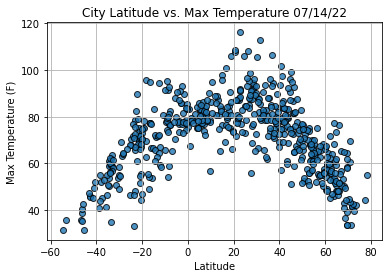

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

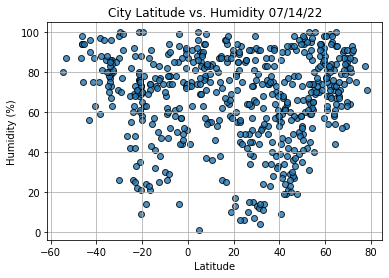

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

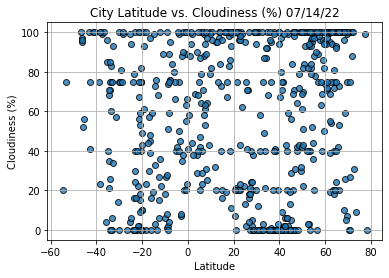

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

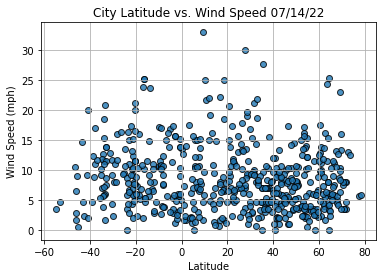

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [39]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [40]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [42]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

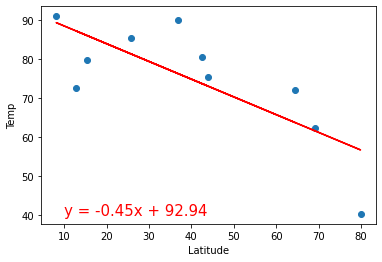

In [43]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2022-07-14 15:40:23,38.4210,-121.4238,80.08,70,0,6.91
1,Tuktoyaktuk,CA,2022-07-14 15:43:58,69.4541,-133.0374,39.20,81,75,23.02
2,Buchanan,LR,2022-07-14 15:43:59,5.8808,-10.0467,76.60,85,100,10.65
4,Tiksi,RU,2022-07-14 15:44:00,71.6872,128.8694,41.32,90,88,3.49
5,Jamestown,US,2022-07-14 15:42:58,42.0970,-79.2353,75.02,61,0,9.22


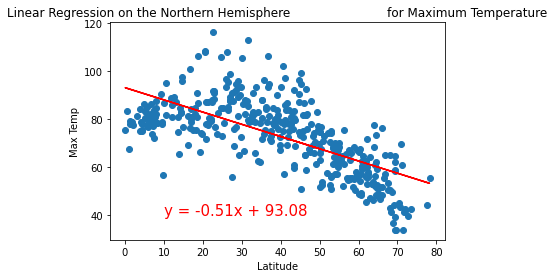

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

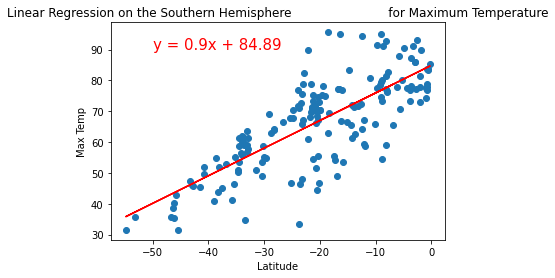

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

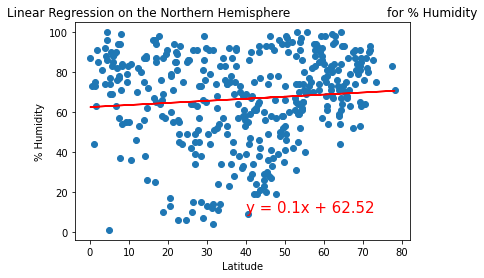

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

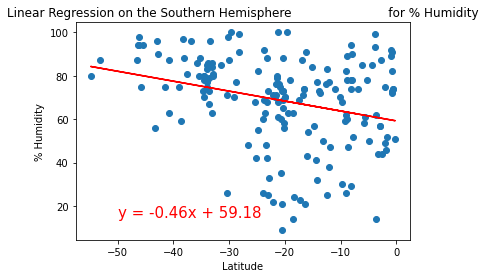

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

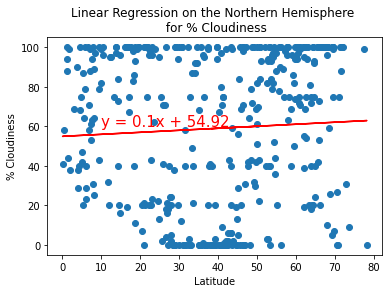

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (10,60))

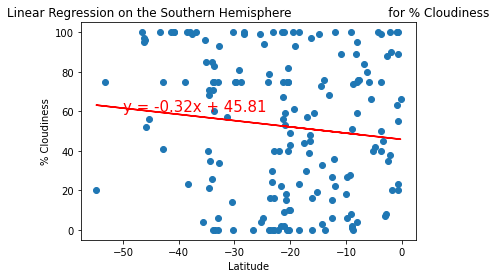

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

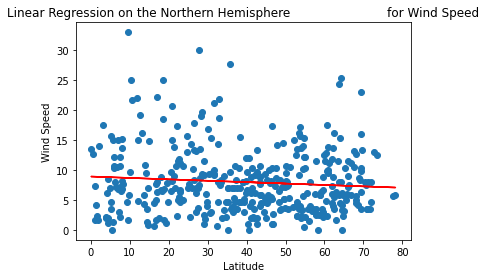

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

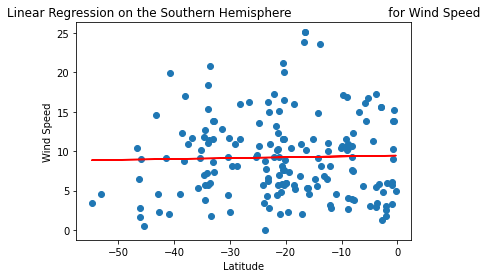

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))